In [1]:
import rebound
import scipy.integrate as integrate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D

# Rebound simulation
The force for a single body will be given by:
$$
    \ddot{\vec{x}} = \left(-\dfrac{GM_h(x)}{x^2} + a_{DF} - \ddot x\dfrac{\dot M_\bullet}{M_\bullet} - qH^2x\right)\hat{x}
$$

## Mass

The host is modeled has a spherically symmetric potential composed of a dark matter halo and a baryonic profile.

In [3]:
SOLAR_MASS = 1
DARK_MATTER_DENSITY_0 = 1
DARK_MATTER_SCALE_RADIUS = 1

## Dark matter halo

For a dark matter halo following a NFW profile:
$$
    \rho(r) = \dfrac{\rho_0}{\frac{r}{R_s}\left(1 + \frac{r}{R_s}\right)^2}
$$

The cumulative mass within some radius $r$ is:
$$
    M = \int\limits_0^{r} 4\pi {r'}^2\rho(r')dr' = 4\pi\rho_0R_s^3\left[\ln\left(\dfrac{R_s + r}{R_s}\right) - \dfrac{r}{R_s + r}\right]
$$

In [4]:
def darkMatterDensity(r):
    global DARK_MATTER_DENSITY_0, DARK_MATTER_SCALE_RADIUS
    
    factor = r / DARK_MATTER_SCALE_RADIUS
    return DARK_MATTER_DENSITY_0 / (factor * (1 + factor) ** 2)

def darkMatterMass(r):
    global DARK_MATTER_DENSITY_0, DARK_MATTER_SCALE_RADIUS
    factor = np.log(1 + r / DARK_MATTER_SCALE_RADIUS) - r / (DARK_MATTER_SCALE_RADIUS + r)
    return 4 * np.pi * DARK_MATTER_DENSITY_0 * factor * DARK_MATTER_SCALE_RADIUS ** 3

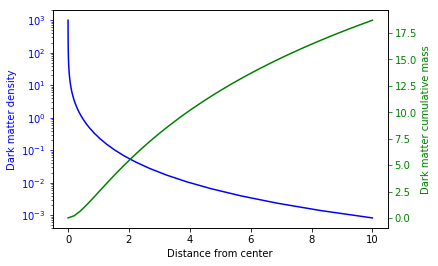

In [19]:
r = np.linspace(1e-3, 10)
r_log = np.logspace(-3, 1)

ds = darkMatterDensity(r_log)
ms = darkMatterMass(r)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel('Distance from center')
ax1.set_ylabel('Dark matter density', color = 'b')
ax1.tick_params('y', colors = 'b')

ax2.set_ylabel('Dark matter cumulative mass', color = 'g')
ax2.tick_params('y', colors = 'g')

ax1.set_yscale('log')

ax1.plot(r_log, ds, c = 'b')
ax2.plot(r, ms, c = 'g')

plt.show()

## Concentration of dark matter halo

$$
    c(M_h, z) = c_0(z)\left(\dfrac{M_h}{10^{13}M}\right)^{\alpha(z)}
$$

$$
    c_0(z) = \dfrac{4.58}{2}\left[\left(\dfrac{1 + z}{2.24}\right)^{0.107} + \left(\dfrac{1 + z}{2.24}\right)^{-1.29}\right]
$$

$$
    \alpha(z) = -0.0965 \exp\left(-\dfrac{z}{4.06}\right)
$$

In [6]:
def darkMatterConcentration(mh, z):
    global SOLAR_MASS
    
    c_0 = (4.58 / 2) * (((1 + z) / 2.24) ** 0.107 + ((1 + z) / 2.24) ** -1.29)
    alpha = -0.0965 * np.exp(- z / 4.06)
    factor = mh / (1e13 * SOLAR_MASS)
    return c_0 * factor ** alpha

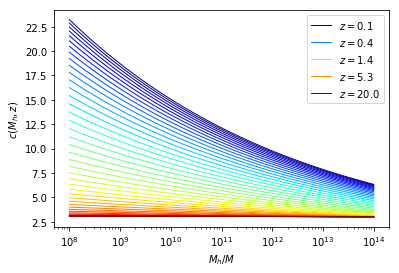

In [7]:
n = 41
every = n // 4
mhs = np.logspace(8, 14)
zs = np.logspace(-1, 1.3, n)

fig = plt.figure()
ax = fig.gca()

colors = cm.jet(np.linspace(0, 1, n))

for i in range(n):
    c = colors[i]
    dm = darkMatterConcentration(mhs, zs[i])
    if i % every == 0:  ax.plot(mhs, dm, c = c, lw = 1, label = '$z = %.1f$' % zs[i])
    else: ax.plot(mhs, dm, c = c, lw = 1)
    
ax.set_xscale('log')
ax.set_xlabel('$M_h/M$')
ax.set_ylabel('$c(M_h, z)$')

ax.legend()

fig.savefig('darkmatter_concentration.png', dpi = 300)

plt.show()

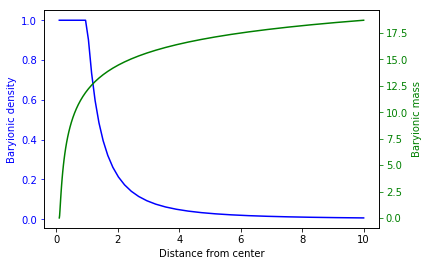

In [22]:
BARIONIC_DENSITY_0 = 1

def baryonicDensityOld(r):
    global BARIONIC_DENSITY_0
    if r < 1:
        return BARIONIC_DENSITY_0
    else:
        return BARIONIC_DENSITY_0 * r ** (-2.2)

def baryonicMassOld(r):
    global BARIONIC_DENSITY_0
    if r < 1:
        return (4 / 3) * np.pi * BARIONIC_DENSITY_0 * r ** 3
    else:
        return 4 * np.pi * BARIONIC_DENSITY_0 * r ** 0.8
    
r = np.logspace(-1, 1)
    
ds = [baryonicDensityOld(r_) for r_ in r]
dm = [baryonicMassOld(r_) for r_ in r]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel('Distance from center')
ax1.set_ylabel('Baryionic density', color = 'b')
ax1.tick_params('y', colors = 'b')

ax2.set_ylabel('Baryionic mass', color = 'g')
ax2.tick_params('y', colors = 'g')

# ax1.set_yscale('log')

ax1.plot(r, ds, c = 'b')
ax2.plot(r, ms, c = 'g')

plt.show()